<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Global-EFA" data-toc-modified-id="Global-EFA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Global-EFA</a></span></li><li><span><a href="#Global-CFA" data-toc-modified-id="Global-CFA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global-CFA</a></span></li><li><span><a href="#Areas-EFA-(prep)" data-toc-modified-id="Areas-EFA-(prep)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Areas-EFA (prep)</a></span></li><li><span><a href="#Areas-EFA-(2-MFs)" data-toc-modified-id="Areas-EFA-(2-MFs)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Areas-EFA (2-MFs)</a></span></li><li><span><a href="#Areas-EFA(para-MFs)" data-toc-modified-id="Areas-EFA(para-MFs)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Areas-EFA(para-MFs)</a></span></li></ul></div>

In [2]:
library(FactoMineR)
library(factoextra)#fviz_eig
library(ggplot2)
library(tidyverse)
library(reshape)#melt
library(nFactors)#optimal number of components
library(psych)
library(corrplot)
library(RColorBrewer)
library(ggrepel)
library(GPArotation)
library(EFA.dimensions)
library(dplyr)
library(lavaan)
library(semPlot)
library(paran)
randomseed = 2023

**************************************************************************************************
EFA.dimensions 0.1.7.9

Please contact Brian O'Connor at brian.oconnor@ubc.ca if you have questions or suggestions.
**************************************************************************************************


载入程辑包：'EFA.dimensions'


The following object is masked from 'package:FactoMineR':

    PCA


Warning message:
"程辑包'lavaan'是用R版本4.1.3 来建造的"
This is lavaan 0.6-15
lavaan is FREE software! Please report any bugs.


载入程辑包：'lavaan'


The following object is masked from 'package:psych':

    cor2cov


Warning message:
"程辑包'semPlot'是用R版本4.1.3 来建造的"
Warning message:
"程辑包'paran'是用R版本4.1.3 来建造的"
载入需要的程辑包：MASS


载入程辑包：'MASS'


The following object is masked from 'package:dplyr':

    select




# Global-EFA

In [3]:
rel_dim_efa_scaled = read.csv('input_global/region_15_efa_scaled.csv')# read.csv('input/Total_scale_var_33v.csv')
dim_rel.ml.var = fa(rel_dim_efa_scaled[2:34],nfactors=5,fm="pa",rotate="oblimin", score="regression")

#dim_rel.ml.var$loadings
scores_var = as.data.frame(dim_rel.ml.var$scores)
loadings_var = as.data.frame(dim_rel.ml.var$loadings[,])

colnames(loadings_var) = c('Formality','Activeness','Valence','Exchange','Equality')
colnames(scores_var) = c('Formality','Activeness','Valence','Exchange','Equality')
    
loadings_filename = paste0('output_global/first_order_efa_results_data/15rg_efa_5d_loadings.csv')
scores_filename = paste0('output_global/first_order_efa_results_data/15rg_efa_5d_scores.csv')
        
write.csv(loadings_var,file=loadings_filename)
write.csv(scores_var,file=scores_filename)

In [4]:
plotnScree <-
function (nScree,
          elbow = 2,
          legend = TRUE,
          ylab   = "Eigenvalues",
          xlab   = "Components",
          main   = "Non Graphical Solutions to Scree Test")
          { 
   if (!inherits(nScree, "nScree"))  stop("Method is only for nScree objects")
   if (nScree$Model == "components") nkaiser = "Eigenvalues (>mean  = " else nkaiser = "Eigenvalues (>0 = "
   if (nScree$Model == "factors")  xlab   = "Factors"
   par(col   = 1, pch = 1, cex.axis=1.5)     # Color and symbol for usual scree
   par(mfrow = c(1,1),lwd=2)
   eig        <- nScree$Analysis$Eigenvalues
   k          <- 1:length(eig)
   plotuScree(x=eig, main=main, xlab="", ylab="")
   nk         <- length(eig)
   noc        <- nScree$Components$noc
   vp.p       <- lm(eig[c(noc+1,nk)] ~ k[c(noc+1,nk)])
   x          <- sum(c(1,1) * coef(vp.p))
   y          <- sum(c(1,nk)* coef(vp.p))
   par(col = 10)            # Color for optimal coordinates
   lines(k[c(1,nk)],c(x,y),lwd=1.8)
   par(col = 11,pch=2)            # Color and symbol for parallel analysis
   lines(1:nk, nScree$Analysis$Par.Analysis, type = "b",lwd=1.8)
   if (legend == TRUE) {
     leg.txt  <- c(paste("Parallel Analysis (n = ",nScree$Components$nparallel,")"),
                 c(paste("Kaiser-Guttman rule (n = ",nScree$Components$nkaiser,")")),
                 c(paste("Cattell’s scree test (n = ",elbow,")")),
                 c(paste("Optimal Coordinates (n = ",nScree$Components$noc,")")) )
     legend("topright",
            legend   = leg.txt,
            pch      = c('△','_','○','_'),
            text.col = c(3,4,1,2), 
            col = c(3,4,1,2),
            cex = 1.6)
     }
   naf        <-   nScree$Components$naf
   text(x = noc ,    y = eig[noc],     label = " (OC)", cex = 1.6, adj = c(0,0), col = 2)
   }

In [5]:
# import relationship dimension ratings scaled from the Data cleaning's output
data = read.csv('output_global/first_order_efa_results_data/15rg_efa_5d_scores.csv', row.names=1,encoding='UTF-8')

# Parallel analysis, Optimal Coordinates, and  Cattell's Scree Test
ev <- eigen(cor(data)) # get eigenvalues
ap <- parallel(subject=nrow(data),var=ncol(data),model="components",rep=5000,cent=.05) 
nS <- nScree(x=ev$values, model = "components",aparallel=ap$eigen$qevpea) # "qevpea" indicate 95 centile given cent=.05 

In [6]:
nS$Analysis$Cumu[1:5]

[1] 0.3890070 0.6375990 0.8008608 0.9216193 1.0000000

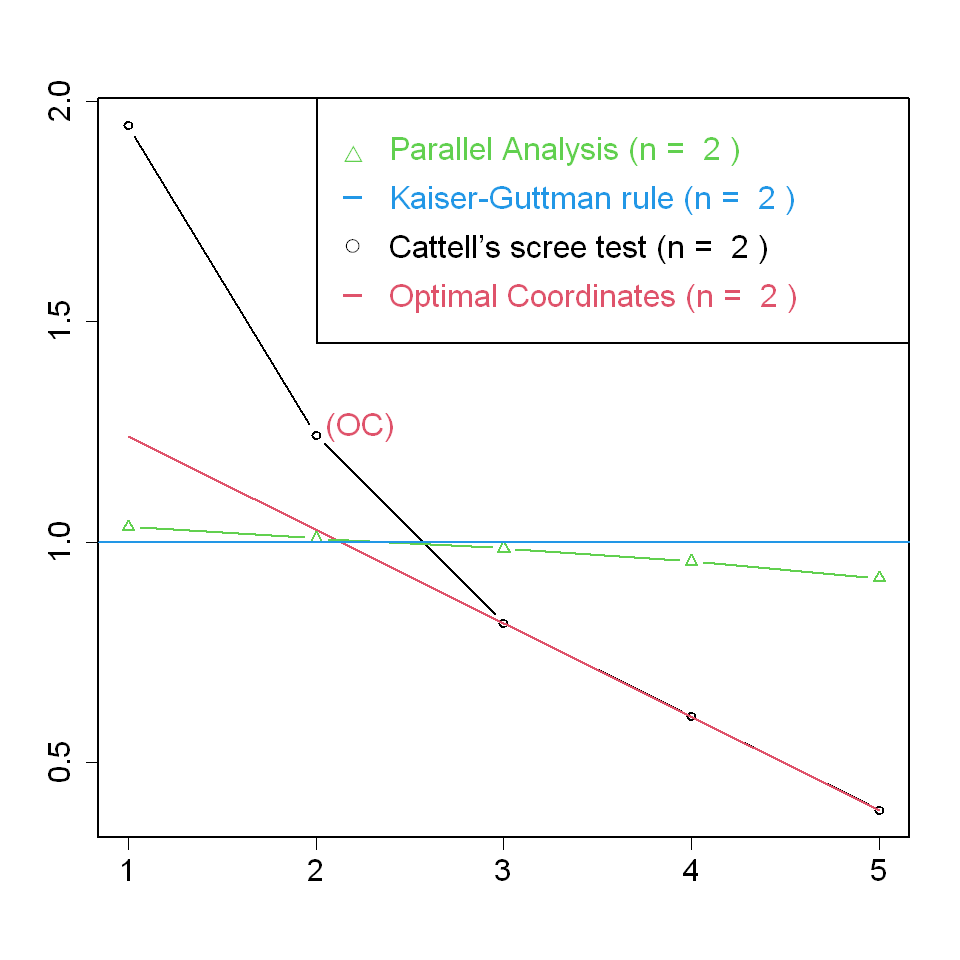

In [7]:
options(repr.plot.width=8,repr.plot.height=8)
plotnScree(nS, elbow = 2,legend=TRUE, main = NULL)
abline(h = 1, col=4, lty=1,lwd =1.8) # Kaiser-Guttman Rule

In [8]:
efa_result <- fa(data, nfactors = 2, fm = "ml", rotate = "oblimin", score = "regression")

#dim_rel.ml.var$loadings
scores_var = as.data.frame(efa_result$scores)
loadings_var = as.data.frame(efa_result$loadings[,])

colnames(loadings_var) = c('Gemeinschaft','Gesellschaft')
colnames(scores_var) = c('Gemeinschaft','Gesellschaft')
write.csv(loadings_var,file='output_global/second_order_efa_results_data/15rg_efa_2d_loadings.csv')
write.csv(scores_var,file='output_global/second_order_efa_results_data/15rg_efa_2d_scores.csv')

In [9]:
efa_data = read.csv('output_global/second_order_efa_results_data/15rg_efa_2d_loadings.csv')
global_melt_data = melt(efa_data)
write.csv(global_melt_data, "output_global/second_order_efa_results_data/15rg_efa_2d_loadings_melt.csv",row.names = FALSE)
global_melt_data

Using X as id variables



X,variable,value
<chr>,<fct>,<dbl>
Formality,Gemeinschaft,0.040201160
Activeness,Gemeinschaft,0.995742707
Valence,Gemeinschaft,0.438842071
Exchange,Gemeinschaft,0.256589728
Equality,Gemeinschaft,0.081877340
Formality,Gesellschaft,0.938045174
Activeness,Gesellschaft,0.005638803
Valence,Gesellschaft,0.103637936
Exchange,Gesellschaft,-0.492588928


In [10]:
colnames(global_melt_data)[1] = 'dim'
colnames(global_melt_data)[2] = 'meta'
head(global_melt_data)

global_melt_data$dim = factor(global_melt_data$dim, levels=rev(c('Activeness','Valence','Formality','Exchange','Equality')))
global_melt_data$meta = factor(global_melt_data$meta, levels=rev(c('Gesellschaft','Gemeinschaft')))

,dim,meta,value
,<chr>,<fct>,<dbl>
1,Formality,Gemeinschaft,0.04020116
2,Activeness,Gemeinschaft,0.99574271
3,Valence,Gemeinschaft,0.43884207
4,Exchange,Gemeinschaft,0.25658973
5,Equality,Gemeinschaft,0.08187734
6,Formality,Gesellschaft,0.93804517


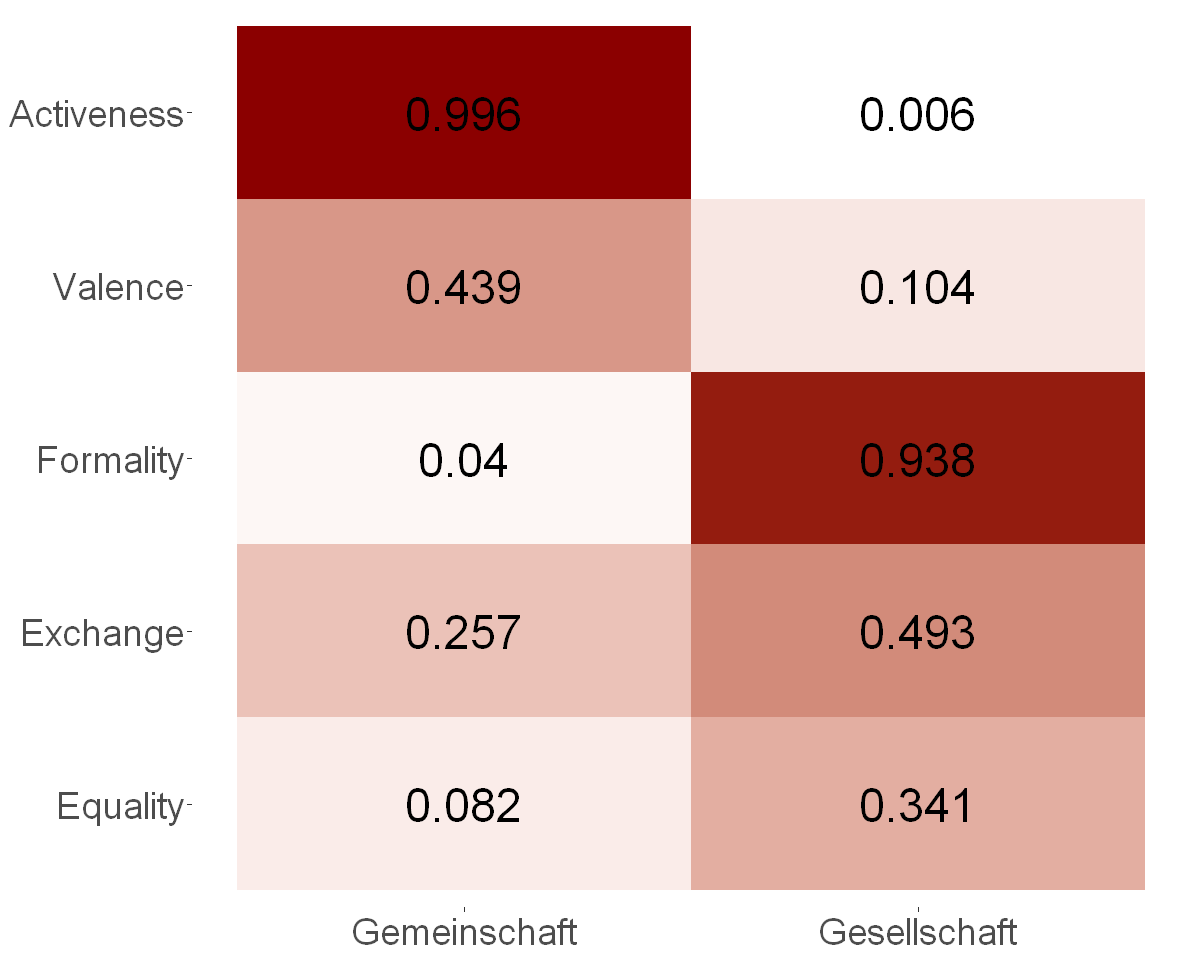

In [11]:
options(repr.plot.width = 10,repr.plot.height = 8)
ggplot(global_melt_data, aes(meta,dim, fill= abs(value))) + 
geom_tile() + 

scale_fill_gradient(low="white", high="darkred") +
geom_text(aes(label=round(abs(value),3)), size = 10)+

theme_classic()+
theme(legend.position='none',
      axis.text = element_text(size=22),
      axis.line = element_line(colour = "white"),
      strip.background = element_rect(color='white',fill='#767171'),
      axis.title = element_blank(),
      panel.spacing = unit(4,"lines"))

# Global-CFA

In [12]:
rel_dim_efa_scaled = read.csv('input_global/region_15_cfa_scaled.csv')# read.csv('input/Total_scale_var_33v.csv')
dim_rel.ml.var = fa(rel_dim_efa_scaled[2:34],nfactors=5,fm="pa",rotate="oblimin", score="regression")

#dim_rel.ml.var$loadings
scores_var = as.data.frame(dim_rel.ml.var$scores)
loadings_var = as.data.frame(dim_rel.ml.var$loadings[,])

colnames(loadings_var) = c('Activeness','Formality','Valence','Exchange','Equality')
colnames(scores_var) = c('Activeness','Formality','Valence','Exchange','Equality')
    
loadings_filename = paste0('output_global/first_order_efa_results_data/15rg_cfa_5d_loadings.csv')
scores_filename = paste0('output_global/first_order_efa_results_data/15rg_cfa_5d_scores.csv')
        
write.csv(loadings_var,file=loadings_filename)
write.csv(scores_var,file=scores_filename)

In [13]:
meta_cfa = read.csv('output_global/first_order_efa_results_data/15rg_cfa_5d_scores.csv')
head(meta_cfa)

,X,Activeness,Formality,Valence,Exchange,Equality
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1.9244757,1.5741776,0.3501810,0.04843729,-0.4566072
2,2,1.3843618,1.0090129,-0.2741866,-0.33031261,-0.2480144
3,3,1.5404495,1.4194532,0.2674907,-0.08934538,2.0577088
4,4,0.9000360,1.3685664,0.5500453,-0.35917679,1.9792853
5,5,0.9310215,0.4316195,-0.2085934,-0.99223070,1.1390557
6,6,-1.8381073,-0.6439818,-2.1760414,-1.04804848,0.1900386


npar                  fmin                 chisq 
               13.000                 0.005                24.675 
                   df                pvalue        baseline.chisq 
                2.000                 0.000              1895.264 
          baseline.df       baseline.pvalue                   cfi 
               10.000                 0.000                 0.988 
                  tli                  logl     unrestricted.logl 
                0.940            -15307.155            -15294.817 
                  aic                   bic                ntotal 
            30640.309             30715.410              2385.000 
                 bic2                 rmsea        rmsea.ci.lower 
            30674.106                 0.069                 0.046 
       rmsea.ci.upper        rmsea.ci.level          rmsea.pvalue 
                0.094                 0.900                 0.082 
       rmsea.close.h0 rmsea.notclose.pvalue     rmsea.notclose.h0 
                0.050                 0.257                 0.080 
                 srmr 
                0.024

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,Valence,~~,Formality,18.93542,-0.13338561,-0.13338561,-0.3511363,-0.3511363
25,Valence,~~,Equality,18.93541,0.06462486,0.06462486,0.1036618,0.1036618
16,Gemeinschaft,=~,Formality,12.42941,-0.35648204,-0.26930980,-0.2793367,-0.2793367
18,Gemeinschaft,=~,Equality,12.42941,0.17271432,0.13047967,0.1426418,0.1426418
28,Exchange,~~,Equality,12.42939,0.09295263,0.09295263,0.1376554,0.1376554
26,Formality,~~,Exchange,12.42936,-0.19185386,-0.19185386,-0.4662833,-0.4662833


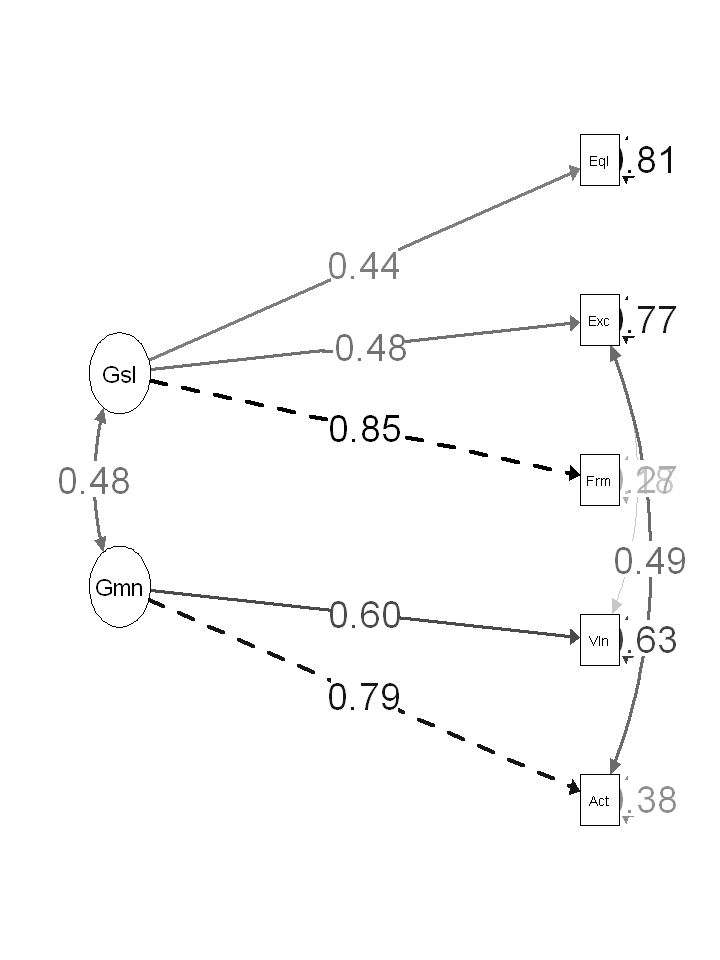

In [14]:
model = '
Gemeinschaft =~ Activeness+Valence
Gesellschaft =~ Formality+Exchange+Equality
Activeness	~~	Exchange
Valence	~~	Exchange
'

fit = cfa(model, data=meta_cfa)
fit_sum = summary(fit, fit.measures=TRUE,standardized = TRUE)
fit_sum$fit
modindices(fit, minimum.value = 10, sort = TRUE)
options(repr.plot.width=6,repr.plot.height=8)
semPaths(fit,what = "std", 
         rotation = 2, 
         edge.color = "black", 
         esize = 4, 
         edge.label.cex = 2, 
         exoVar = F)

# Areas-EFA (prep)

In [15]:
files <- list.files(path = "input_areas", pattern = "\\.csv$", full.names = TRUE)
data_list <- list()
for (i in seq_along(files)) {
  data_list[[i]] <- read.csv(files[i])
}
names(data_list) <- tools::file_path_sans_ext(basename(files))
print(names(data_list))

 [1] "Australia_dim_rel_scaled"    "Brazil_dim_rel_scaled"      
 [3] "Chile_dim_rel_scaled"        "CHN_dim_rel_scaled"         
 [5] "Egypt_dim_rel_scaled"        "France_dim_rel_scaled"      
 [7] "Germany_dim_rel_scaled"      "HK_dim_rel_scaled"          
 [9] "India_dim_rel_scaled"        "Israel_dim_rel_scaled"      
[11] "Japan_dim_rel_scaled"        "Mexico_dim_rel_scaled"      
[13] "Portugal_dim_rel_scaled"     "Qatar_dim_rel_scaled"       
[15] "Russia_dim_rel_scaled"       "South_africa_dim_rel_scaled"
[17] "Spain_dim_rel_scaled"        "Total_scale_var_33v"        
[19] "UK_dim_rel_scaled"           "USA_dim_rel_scaled"         


In [16]:
for (i in 1: 20) {
    rel_dim_efa_scaled = data_list[[i]]
    dim_rel.ml.var = fa(rel_dim_efa_scaled[2:34],nfactors=5,fm="ml",rotate="oblimin", score="regression")

    #dim_rel.ml.var$loadings
    scores_var = as.data.frame(dim_rel.ml.var$scores)
    loadings_var = as.data.frame(dim_rel.ml.var$loadings[,])

    colnames(loadings_var) = c('F1','F2','F3','F4','F5')
    colnames(scores_var) = c('F1','F2','F3','F4','F5')
    
    textname = unlist(strsplit(names(data_list[i]), "_"))
    region = textname[1]
    
    loadings_filename = paste0('output_areas/first_order_efa_results/', region, '_efa_5d_loadings.csv')
    scores_filename = paste0('output_areas/first_order_efa_results/', region, '_efa_5d_scores.csv')
        
    write.csv(loadings_var,file=loadings_filename)
    write.csv(scores_var,file=scores_filename)
}

# Areas-EFA (2-MFs)

In [17]:
regions_data <- read.csv("mapping_list/19regions.csv")
folder_path <- "output_areas/first_order_efa_results/"
file_list <- list.files(folder_path, pattern = "_efa_5d_scores.csv", full.names = TRUE)
mf_data <- list()

for (file_path in file_list) {
    data <- read.csv(file_path,row.names=1)
    efa_result <- fa(data, nfactors = 2, fm = "ml", rotate = "oblimin", score = "regression")
    efa_result = efa_result$loadings[,] # nfactor determined how many second order factors

    region = strsplit(strsplit(file_path,'first_order_efa_results/')[[1]][2],'_')[[1]][1]
    mf_data[[region]] <- efa_result
}

In [18]:
melt_mf_data = melt(mf_data)
write.csv(melt_mf_data, "output_areas/melt_mf_data/melt_mf_data.csv",row.names = FALSE)

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning me

In [19]:
data = read.csv('output_areas/melt_mf_data/melt_mf_data.csv')
regions_data <- read.csv("mapping_list/regions_favee.csv")
regions_data_melt = melt(regions_data,id.vars=c('X'))
colnames(regions_data_melt)[1] = 'L1'
colnames(regions_data_melt)[2] = 'X1'
head(regions_data_melt)

,L1,X1,value
,<chr>,<fct>,<chr>
1,Australia,F1,Formality
2,Brazil,F1,Activeness
3,Chile,F1,Formality
4,CHN,F1,Activeness
5,Egypt,F1,Activeness
6,France,F1,Formality


In [20]:
data_final = merge(regions_data_melt,data, by = c('L1','X1'))
data_final$value.x = factor(data_final$value.x, levels=rev(c('Activeness','Valence','Formality','Exchange','Equality')))
data_final$L1 = factor(data_final$L1, levels=rev(c('India','Qatar','Brazil','Chile','USA','UK','Russia','South','France','Egypt', 'Israel', 'Spain','Portugal','Germany', 'Australia','Mexico','Japan','HK','CHN','Total')))
head(data_final)

,L1,X1,value.x,X2,value.y
,<fct>,<fct>,<fct>,<chr>,<dbl>
1,Australia,F1,Formality,ML1,0.046269103
2,Australia,F1,Formality,ML2,0.792990474
3,Australia,F2,Activeness,ML1,0.998247383
4,Australia,F2,Activeness,ML2,-0.003321546
5,Australia,F3,Valence,ML1,0.375138008
6,Australia,F3,Valence,ML2,0.142465604


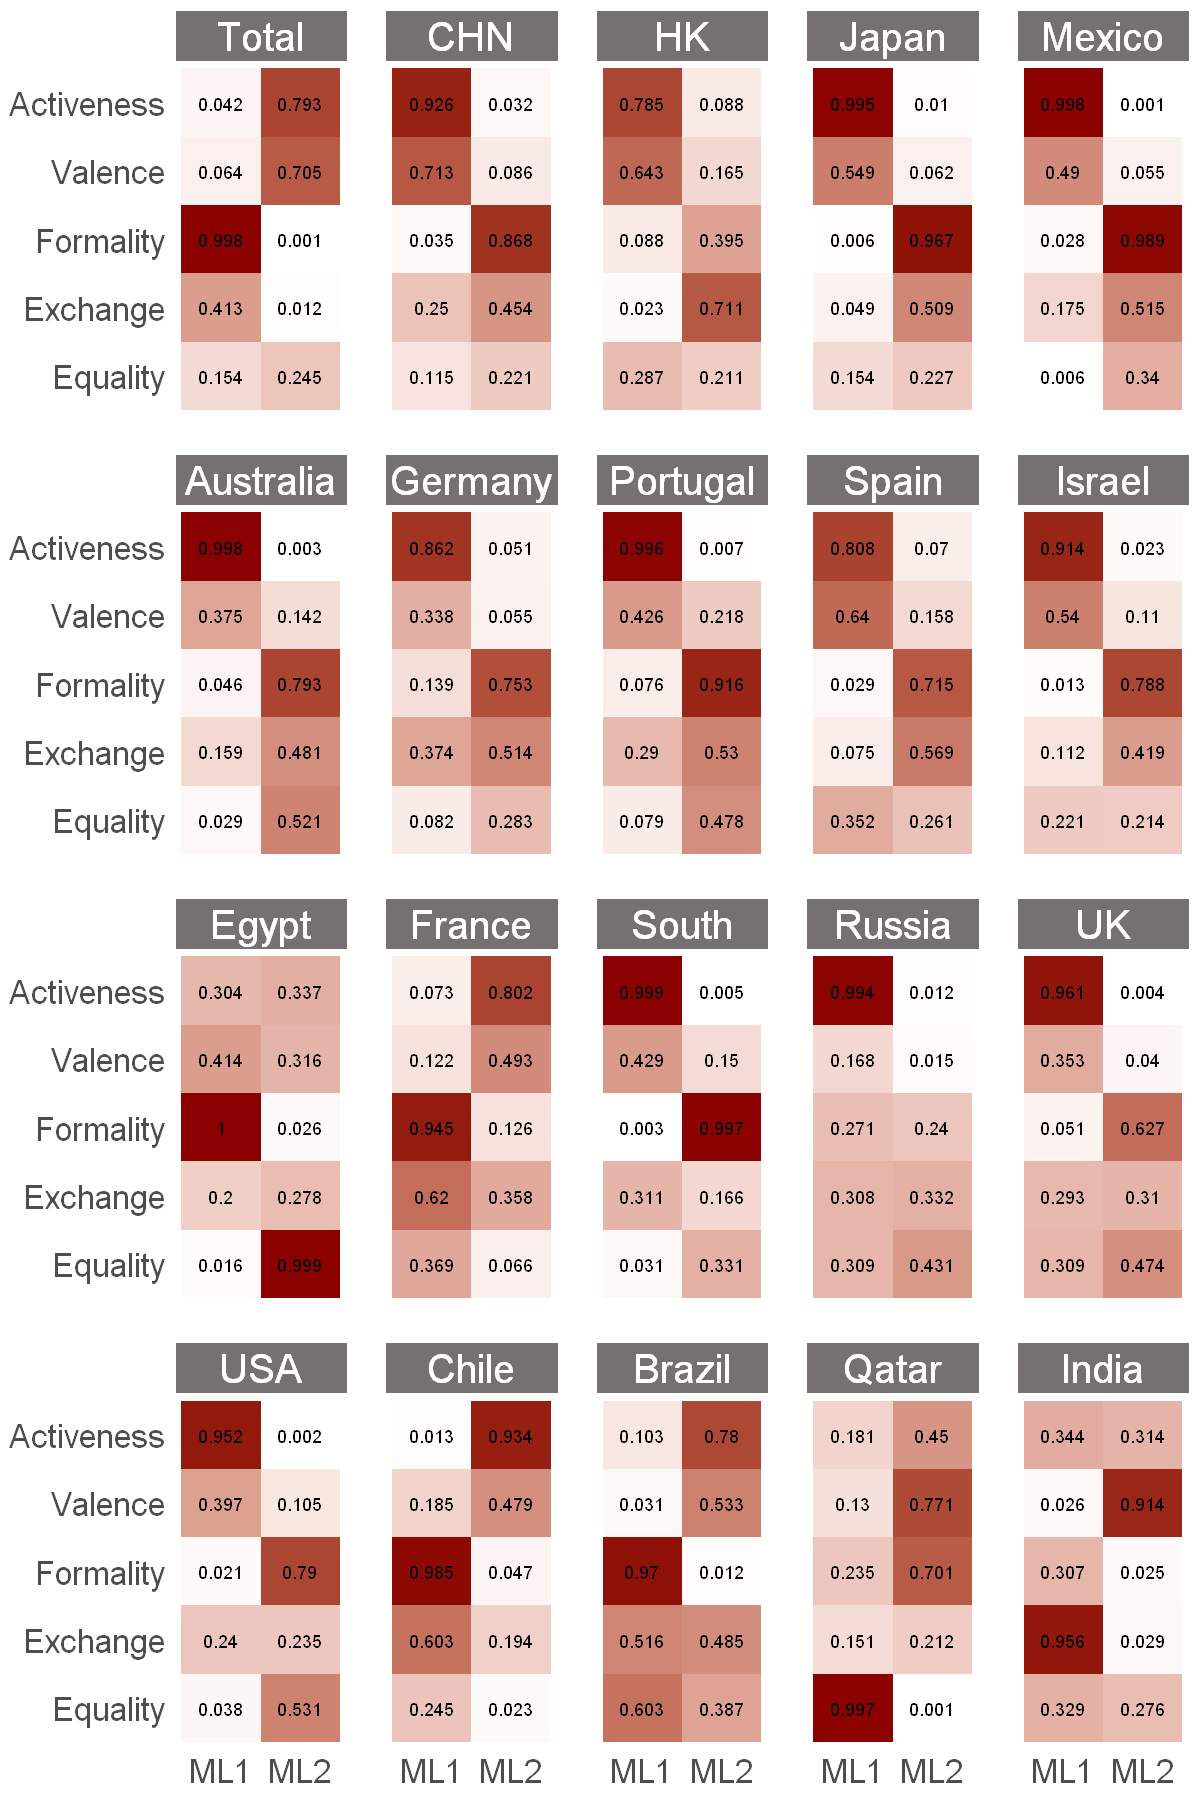

In [21]:
options(repr.plot.width = 10,repr.plot.height = 15)
ggplot(data_final, aes(X2, value.x, fill= abs(value.y))) + 
geom_tile() + 
scale_fill_gradient(low="white", high="darkred") +

facet_wrap(L1~.,ncol=5) + 
geom_text(aes(label=round(abs(value.y),3)))+

theme_classic()+
theme(legend.position='none',
      axis.text = element_text(size=20),
      axis.line = element_line(colour = "white"),
      strip.background = element_rect(color='white',fill='#767171'),
      axis.ticks = element_blank(),
      strip.text = element_text(size=24,color='white'),
      axis.title = element_blank(),
      panel.spacing = unit(1.5,"lines"))

# Areas-EFA(para-MFs)

In [22]:
regions_data <- read.csv("mapping_list/19regions.csv")
folder_path <- "output_areas/first_order_efa_results/"
file_list <- list.files(folder_path, pattern = "_efa_5d_scores.csv", full.names = TRUE)
pmf_data <- list()

for (file_path in file_list) {
    data <- read.csv(file_path,row.names=1)
    nfactor <- paran(data, iterations = 5000, 
          centile = 0, quietly = TRUE, 
          status = FALSE, all = TRUE, 
          cfa = TRUE, graph = FALSE)

    efa_result <- fa(data, nfactors = nfactor$Retained, fm = "ml", rotate = "varimax", score = "regression")
    efa_result = efa_result$loadings[,]

    region = strsplit(strsplit(file_path,'first_order_efa_results/')[[1]][2],'_')[[1]][1]
    pmf_data[[region]] <- efa_result
}


Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.

Using eigendecomposition of correlation matrix.


In [23]:
melt_pmf_data = melt(pmf_data)
write.csv(melt_pmf_data, "output_areas/melt_pmf_data/melt_pmf_data.csv",row.names = FALSE)

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning me

In [24]:
data = read.csv('output_areas/melt_pmf_data/melt_pmf_data.csv')
regions_data <- read.csv("mapping_list/regions_favee.csv")
regions_data_melt = melt(regions_data,id.vars=c('X'))
colnames(regions_data_melt)[1] = 'L1'
colnames(regions_data_melt)[2] = 'X1'
head(regions_data_melt)

,L1,X1,value
,<chr>,<fct>,<chr>
1,Australia,F1,Formality
2,Brazil,F1,Activeness
3,Chile,F1,Formality
4,CHN,F1,Activeness
5,Egypt,F1,Activeness
6,France,F1,Formality


In [25]:
data_final = merge(regions_data_melt,data, by = c('L1','X1'))
data_final$value.x = factor(data_final$value.x, levels=rev(c('Activeness','Valence','Formality','Exchange','Equality')))
data_final$L1 = factor(data_final$L1, levels=rev(c('India','Qatar','Brazil','Chile','USA','UK','Russia','South','France','Egypt', 'Israel', 'Spain','Portugal','Germany', 'Australia','Mexico','Japan','HK','CHN','Total')))
head(data_final)

,L1,X1,value.x,X2,value.y
,<fct>,<fct>,<fct>,<chr>,<dbl>
1,Australia,F1,Formality,ML1,0.24494053
2,Australia,F1,Formality,ML2,0.76659964
3,Australia,F2,Activeness,ML1,0.99713447
4,Australia,F2,Activeness,ML2,-0.02688672
5,Australia,F3,Valence,ML1,0.41072740
6,Australia,F3,Valence,ML2,0.12902591


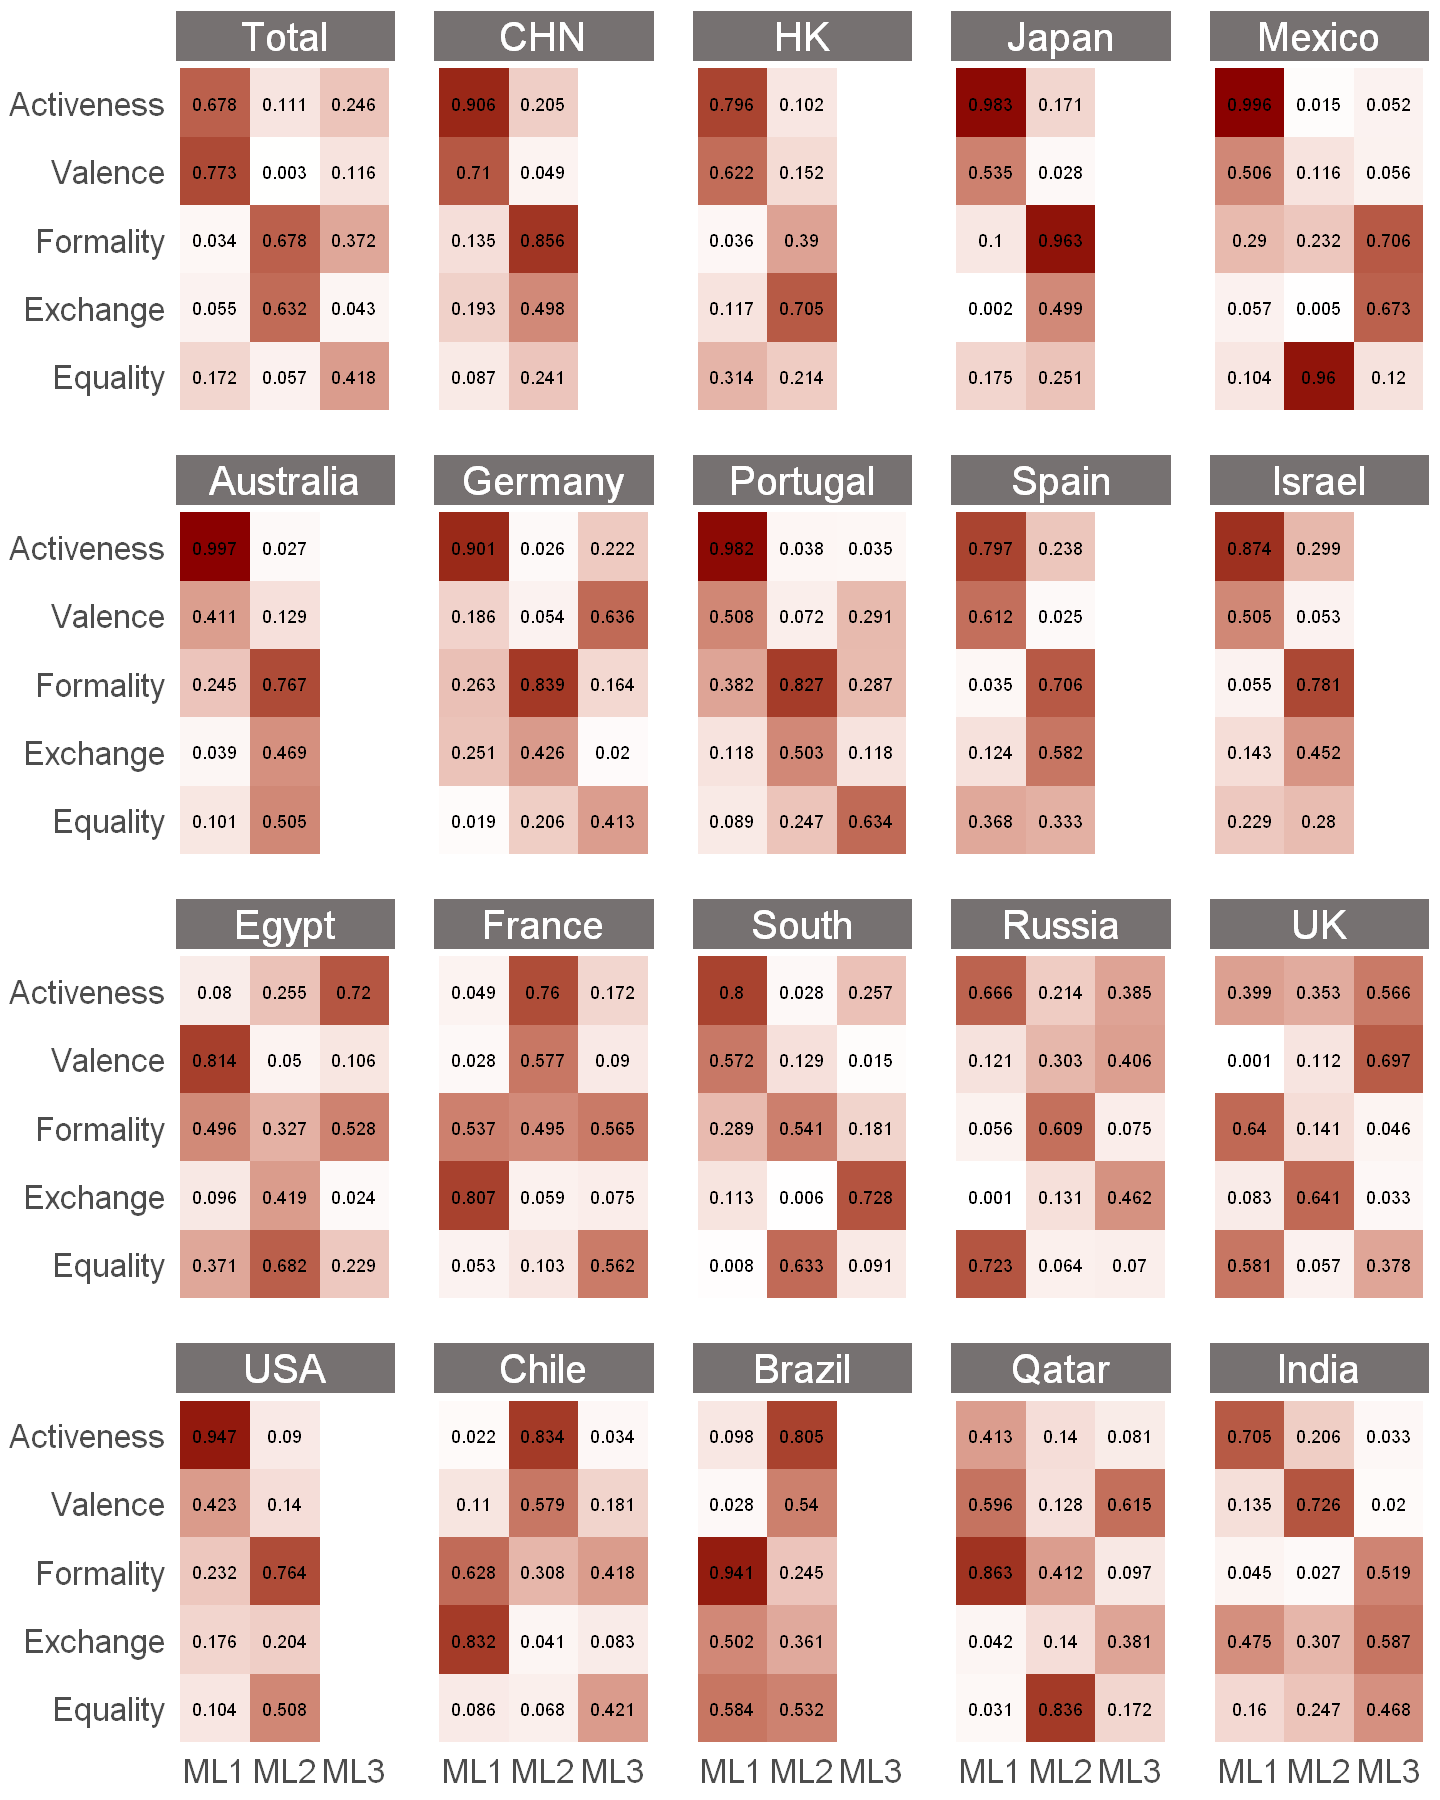

In [26]:
options(repr.plot.width = 12,repr.plot.height = 15)
ggplot(data_final, aes(X2, value.x, fill= abs(value.y))) + 
geom_tile() + 
scale_fill_gradient(low="white", high="darkred") +

facet_wrap(L1~.,ncol=5) + 
geom_text(aes(label=round(abs(value.y),3)))+

theme_classic()+
theme(legend.position='none',
      axis.text = element_text(size=20),
      axis.line = element_line(colour = "white"),
      strip.background = element_rect(color='white',fill='#767171'),
      axis.ticks = element_blank(),
      strip.text = element_text(size=24,color='white'),
      axis.title = element_blank(),
      panel.spacing = unit(1.5,"lines"))